In [2]:
import glob

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [4]:
import os
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

In [57]:
%config InlineBackend.figure_format = 'retina'

In [63]:
path = r'C:\Users\No\(SMU)데이터분석의이해(계량경제학)\team_pj\new'                     # use your path
all_files = glob.glob(os.path.join(path, "*.xlsx"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = [pd.read_excel(f, index_col=0) for f in all_files]
concatenated_df   = pd.DataFrame()
for df in df_from_each_file:
    concatenated_df = pd.concat([concatenated_df, df], axis=1, join='outer')

In [64]:
concatenated_df.to_excel('테스트.xlsx')

In [131]:
df_from_each_file

[             cds 스프레드  외환시장 압력지수  코스피 변동성지수  국내은행 CDS 평균
 날짜                                                      
 2004-02-01  77.874000  -1.675802   0.009047    59.910000
 2004-03-01  71.508030  -0.748520   0.010758    55.613636
 2004-04-01  69.588333  -0.158935   0.012584    54.905000
 2004-05-01  78.266667   0.504777   0.019983    65.152632
 2004-06-01  71.619697  -0.555545   0.025645    57.990909
 ...               ...        ...        ...          ...
 2019-03-01  58.080227   0.566768   0.007329    30.679505
 2019-04-01  60.309022   0.702944   0.007018    32.719000
 2019-05-01  62.114601   1.309905   0.008385    35.248771
 2019-06-01  61.471288   0.630156   0.007988    33.446000
 2019-07-01  58.207552   0.183543   0.006964    31.208678
 
 [186 rows x 4 columns],
                   원자료     M2증가율
 날짜                             
 1986-01-01    43133.6       NaN
 1986-02-01    43492.4  0.008318
 1986-03-01    44587.1  0.025170
 1986-04-01    45188.7  0.013493
 1986-05-01    46197.

In [132]:
concatenated_df.to_excel('테스트.xlsx')

---------

# 히트맵 탐색

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns    

In [138]:
df = pd.read_excel('preprocessing.xlsx')

In [139]:
df.columns

Index(['Unnamed: 0', 'cds 스프레드', '외환시장 압력지수', '코스피 변동성지수', '국내은행 CDS 평균',
       '원자료', 'M2증가율', 'valUSA', 'valCAN', 'valGBR',
       ...
       '원계열', '계절조정', '원/달러', '원/엔', '원/유로', 'S&P.1', '항셍.1', 'SToxx.1',
       '코스피.1', '코스닥.1'],
      dtype='object', length=110)

In [142]:
frame = pd.DataFrame()

In [143]:
a = df.corrwith(df['스프레드'])

In [145]:
frame['스프레드상관관계'] = a

In [148]:
frame.to_excel('스프레드상관관계.xlsx')

In [125]:
df.corrwith(df['스프레드']).tail(10)

원계열       -0.018728
계절조정      -0.089545
원/달러       0.586860
원/엔        0.535106
원/유로       0.740543
S&P.1     -0.380493
항셍.1      -0.236983
SToxx.1   -0.554948
코스피.1     -0.276410
코스닥.1     -0.432868
dtype: float64

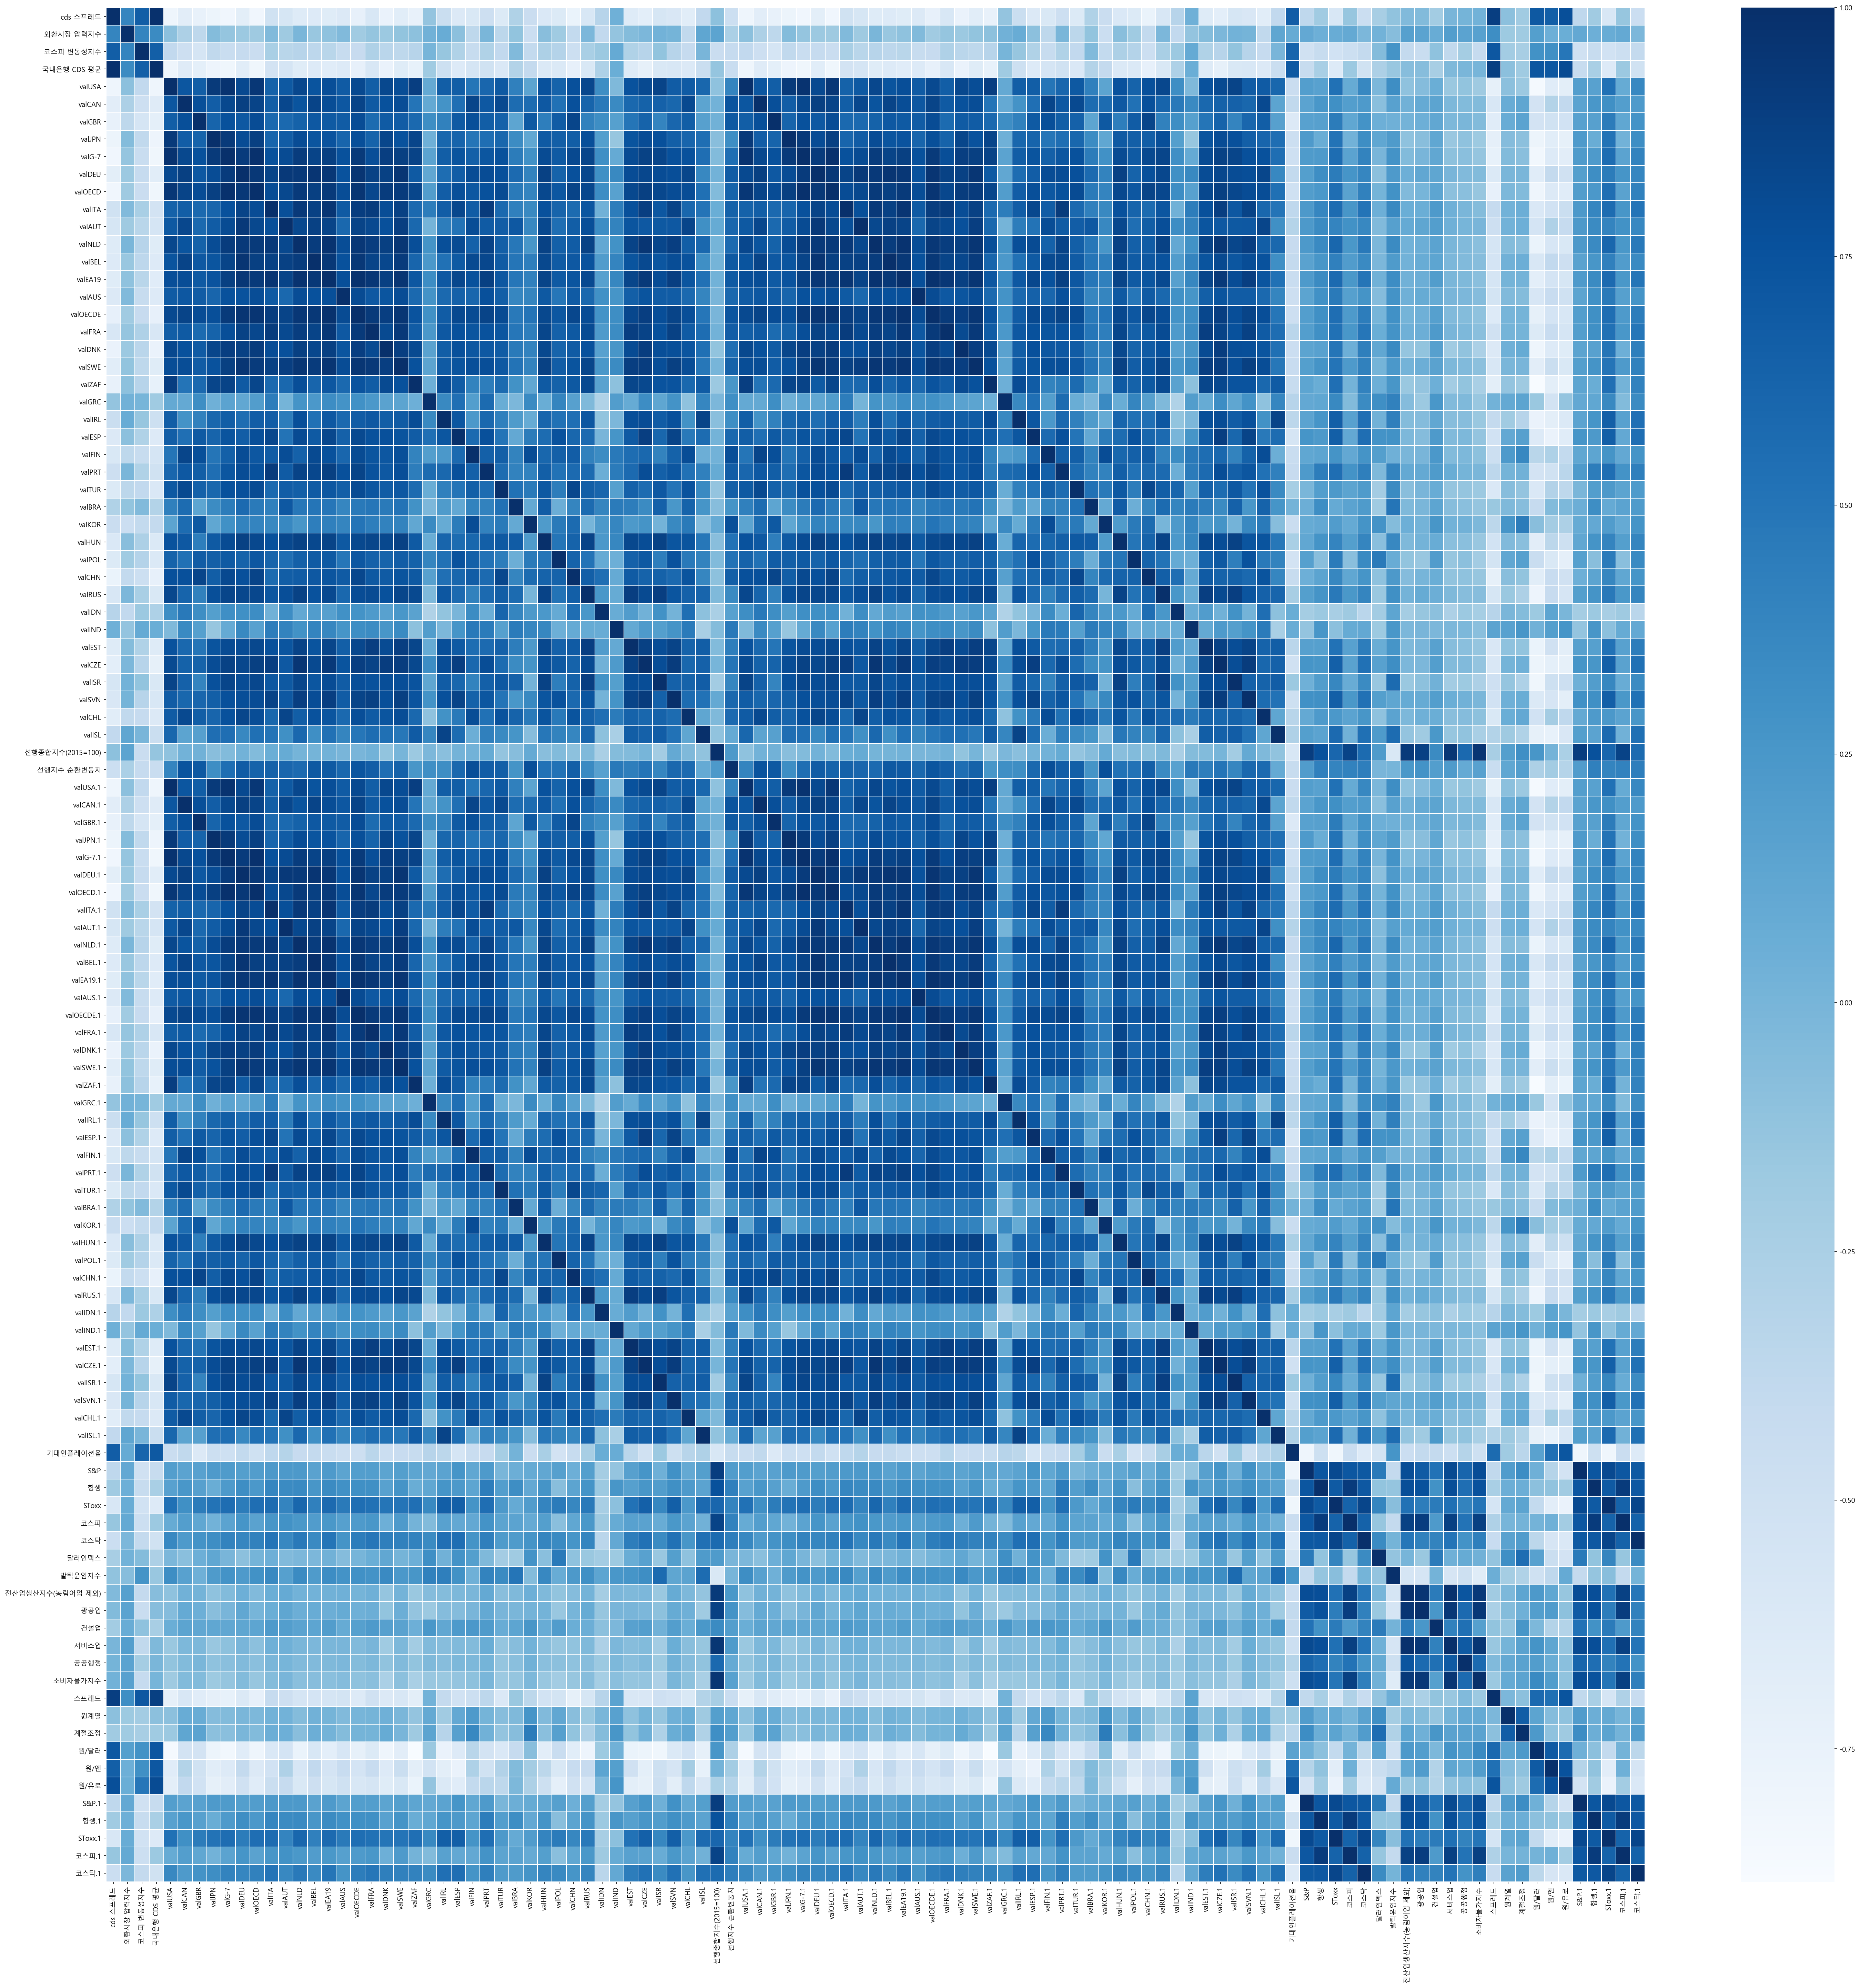

In [124]:
plt.figure(figsize=(50,50))
sns.heatmap(data = df.corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

-------

# 어음부도율, 국고채금리, VIX지수 추가

In [13]:
m_df = pd.read_excel('m단기유동성지표 모음_최종.xlsx', sheet_name='어음부도율')
v_df = pd.read_excel('new/VIX.xlsx')

In [33]:
k_df = pd.read_excel('new/국고채금리.xlsx')

In [18]:
m_df.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
m_df

,날짜,어음 부도율
0,1998-01-01,0.53
1,1998-02-01,0.62
2,1998-03-01,0.47
3,1998-04-01,0.42
4,1998-05-01,0.45
...,...,...
262,2019-11-01,0.00
263,2019-12-01,0.01
264,2020-01-01,0.01
265,2020-02-01,0.00


In [22]:
v_df.sort_values(by='날짜', inplace=True)

In [31]:
v_df[v_df['VIX'].isna()]

,날짜,VIX
7879,1990-02-01,NaN
7840,1990-04-01,NaN
7809,1990-05-01,NaN
7782,1990-07-01,NaN
7739,1990-09-01,NaN
...,...,...
92,2019-12-01,NaN
74,2020-01-01,NaN
87,2020-01-01,NaN
54,2020-02-01,NaN


In [27]:
v_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7914 entries, 7913 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      7914 non-null   datetime64[ns]
 1   VIX     7640 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 185.5 KB


In [36]:
k_df.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
pre_df = pd.read_excel('preprocessing.xlsx')

In [43]:
pre_df.set_index('Unnamed: 0', inplace=True)

In [42]:
pre_df

,Unnamed: 0,cds스프레드,외환시장압력지수,코스피변동성지수,국내은행CDS 평균,원자료,M2증가율,valUSA,valCAN,valGBR,...,계절조정,원/달러,원/엔,원/유로,S&P.1,항셍.1,SToxx.1,코스피.1,코스닥.1,스프레드
0,2004-02-01,77.874000,-1.675802,0.009047,59.910000,906803.8,0.006387,100.9695,100.7158,100.5432,...,3.6,1166.69,1095.65,1473.87,1143.36,1750.11,239.79,867.45,439.05,0.800
1,2004-03-01,71.508030,-0.748520,0.010758,55.613636,916675.5,0.010886,101.0333,100.7596,100.5829,...,3.6,1166.34,1073.06,1430.01,1123.98,1689.21,238.78,875.58,431.49,0.790
2,2004-04-01,69.588333,-0.158935,0.012584,54.905000,918329.7,0.001805,101.0352,100.7409,100.5781,...,3.6,1150.85,1071.23,1381.28,1133.08,1617.85,243.94,907.14,463.20,0.750
3,2004-05-01,78.266667,0.504777,0.019983,65.152632,921252.0,0.003182,100.9946,100.6667,100.5439,...,3.7,1177.37,1048.86,1412.17,1102.78,1496.03,236.23,798.79,408.41,0.680
4,2004-06-01,71.619697,-0.555545,0.025645,57.990909,927101.8,0.006350,100.9211,100.5644,100.4985,...,3.5,1158.65,1059.02,1407.31,1132.76,1550.23,240.80,771.61,383.97,0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-01-01,NaN,NaN,NaN,NaN,2929009.2,0.005691,NaN,NaN,NaN,...,4.0,1164.28,1065.25,1293.70,3278.20,3853.23,419.24,2203.44,671.12,0.582
192,2020-02-01,NaN,NaN,NaN,NaN,2954603.8,0.008738,NaN,NaN,NaN,...,3.3,1193.79,1084.95,1302.33,3277.31,3739.78,419.51,2167.12,667.30,0.594
193,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.8,1220.09,1134.75,1350.35,2652.39,3322.25,322.48,1786.75,549.44,0.749
194,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1225.23,1135.31,1331.71,NaN,3339.06,NaN,1849.59,615.60,1.121


In [44]:
concatenated_df = pd.concat([pre_df, m_df], axis=1, join='outer')

In [46]:
concatenated_df = pd.concat([concatenated_df, v_df], axis=1, join='outer')

In [47]:
concatenated_df = pd.concat([concatenated_df, k_df], axis=1, join='outer')

In [48]:
concatenated_df.to_excel('pre_ver_01.xlsx')

---------

# 빅스 추가

In [65]:
df = pd.read_excel('M2추가.xlsx')
vix = pd.read_excel('full_data.xlsx')

In [67]:
vix.iloc[:,-1]

0      15.973000
1      17.687391
2      15.701818
3      17.619048
4      15.366136
         ...    
191    13.841739
192    19.360250
193    57.736818
194    41.452273
195    37.190000
Name: CBOE Volatility Index, Length: 196, dtype: float64

In [68]:
df['VIX'] = vix.iloc[:,-1]

In [71]:
df.to_excel('preprocessing_ver02.xlsx')

--------

In [69]:
df = pd.read_excel('preprocessing_ver04.xlsx')

In [70]:
m2 = pd.read_excel('전산업_m2계절.xlsx')

In [71]:
m2.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
m2.columns = ['Unnamed: 0.1', '전산업생산지수', 'M2계절조정']

In [56]:
df.set_index('Unnamed: 0.1', inplace=True)

In [57]:
m2.set_index('Unnamed: 0.1', inplace=True)

In [85]:
con_df = pd.merge(m2,df,on=['Unnamed: 0.1'],how='outer')

In [86]:
con_df

,Unnamed: 0.1,전산업생산지수_x,M2계절조정,cds스프레드,외환시장압력지수,코스피변동성지수,국내은행CDS평균,M2,M2증가율,valG-7,...,코스피.1,코스닥.1,스프레드,M2_어음부도율,M2_국고채금리,M2_외환시장압력지수,M2_cds스프레드,VIX,M2_VIX,M2_log
0,2002-02-01,64.9,778406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-01,65.4,793517.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-04-01,66.1,804343.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-05-01,66.0,814754.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-06-01,65.7,821769.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2929009.2,0.005691,NaN,...,2203.44,671.12,0.582,29290.092,4.021530e+06,NaN,NaN,13.841739,4.054258e+07,14.890175
216,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,2954603.8,0.008738,NaN,...,2167.12,667.30,0.594,0.000,3.702119e+06,NaN,NaN,19.360250,5.720187e+07,14.898875
217,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1786.75,549.44,0.749,NaN,NaN,NaN,NaN,57.736818,NaN,NaN
218,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1849.59,615.60,1.121,NaN,NaN,NaN,NaN,41.452273,NaN,NaN


In [87]:
con_df.to_excel('테스트9.xlsx')

-------

In [92]:
df = pd.read_excel('preprocessing_ver06_요청데이터.xlsx')
cds = pd.read_excel('cds스프레드.xlsx')

In [97]:
df

,날짜,M2계절조정,cds스프레드,외환시장압력지수,코스피변동성지수,선행종합지수(2015=100),전산업생산지수,스프레드,VIX
0,2004-02-01,907172.8,77.874000,-1.675802,0.009047,64.6,65.2,0.800,15.973000
1,2004-03-01,913480.8,71.508030,-0.748520,0.010758,64.9,71.8,0.790,17.687391
2,2004-04-01,915889.2,69.588333,-0.158935,0.012584,65.1,70.7,0.750,15.701818
3,2004-05-01,923429.4,78.266667,0.504777,0.019983,65.1,70.6,0.680,17.619048
4,2004-06-01,925036.3,71.619697,-0.555545,0.025645,65.1,71.3,0.630,15.366136
...,...,...,...,...,...,...,...,...,...
191,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.582,13.841739
192,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,0.594,19.360250
193,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,0.749,57.736818
194,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1.121,41.452273


In [94]:
cds

,날짜,cds 스프레드
0,2001-04-01,152.750000
1,2001-05-01,143.227273
2,2001-06-01,129.450000
3,2001-07-01,125.952381
4,2001-08-01,107.818182
...,...,...
215,2019-03-01,58.080227
216,2019-04-01,60.309022
217,2019-05-01,62.114601
218,2019-06-01,61.471288


In [95]:
con_df = pd.merge(df,cds,on=['날짜'],how='outer')

In [96]:
con_df.to_excel('테스트변수.xlsx')